# EDA - Exploratory Data Analysis

Let's now look at the dataset and look into how we can interrogate it to get insights

## Interrogate more and the data will confess!!

### Importing the libraries

- <b>Pandas</b> : Used to read the dataset and analyse it
- <b>Numpy</b> : Used for mathematical calculations (like filling missing values, logarithmic transformation etc.)
- <b>Matplotlib</b> : Daddy of all visulisation libraries and functions XD. This is helpful in providing figures(canvas) for plotting the data and also enables us to customise the visualisations a bit!
- <b>Seaborn</b> : Helps us make cool and stunning visualisations for the data, helps us get innnnsights!

In [1]:
import time
start = time.time()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing and reading the dataset

In [2]:
test = pd.read_csv('test.csv')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# DATA CLEANING


#### Looking at the missing data

Before we get in bed with the data we should be aware it tells us the truth!
So we look for the amount of missing values in the dataset.

In [5]:
missing_values = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)),2).rename("Missing values %").sort_values(ascending=False))
missing_values

,Missing values %
Cabin,77.10
Age,19.87
Embarked,0.22
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
SibSp,0.00
Parch,0.00


#### Dropping the missing values according to their magnitude

Here we are dropping Cabin as it has 77.1% of its values missing :(
But we are going to look at imputing the Age column, so don't worry!

In [6]:
df.drop('Cabin',axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Imputing the Age column

Here we cannot afford to lose this column as we might now not have much of data to analyse if we drop everything :)

In [7]:
df.loc[np.isnan(df['Age']),['Age']] = df['Age'].mean()
round(100*(df.isnull().sum()/len(df.index)),2).rename("Missing Values %").sort_values(ascending=False)

Embarked       0.22
PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Name: Missing Values %, dtype: float64

Here we are dropping the rows where Embarked column is NULL

In [8]:
df = df.dropna(subset=['Embarked'],axis=0)
df.shape

(889, 11)

In [9]:
missing_values = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)),2).rename("Missing values %").sort_values(ascending=False))
missing_values

,Missing values %
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


# Performing EDA

This is the interesting part of the game where you get to know what is what!
Lets now look at some cool plots where we get to see the relationship of variables with each other

#### Heatmaps

Lets look at the correlation b/w variables amongst themselves and look at it in a matrix form

In [10]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


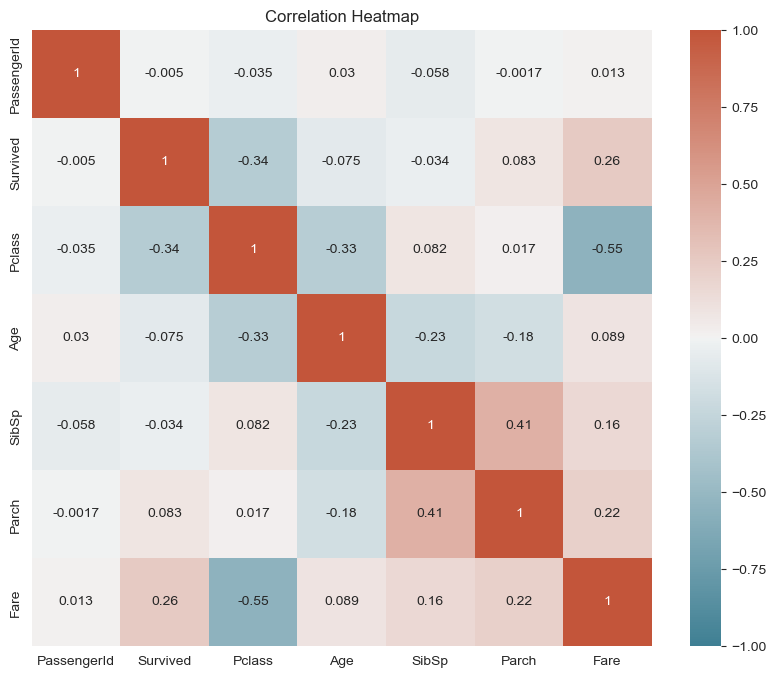

In [11]:
plt.figure(figsize=(10, 8))  # Adjust the figure size
#Here is where matplotlib comes into the picture, it creates a figure for you to plot and use it for calling other
#libraries on top of it

# Customizing the color palette, trust me this is the best I could come up with :(
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Creating the heatmap, this gives you the details about the correlation b/w the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)

# Add a title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

From the above heatmap we can conclude that Rate of Survival is directly proportional to Fare XD
And the Passenger Class is inversely proportional or has a negative correlation with Rate of Survival.

We can go on and on but we'll look at them in detail going further

#### Lineplots

Plotted in a straight line, used to plot the relationship b/w 2 variables

<Axes: xlabel='Survived', ylabel='Fare'>

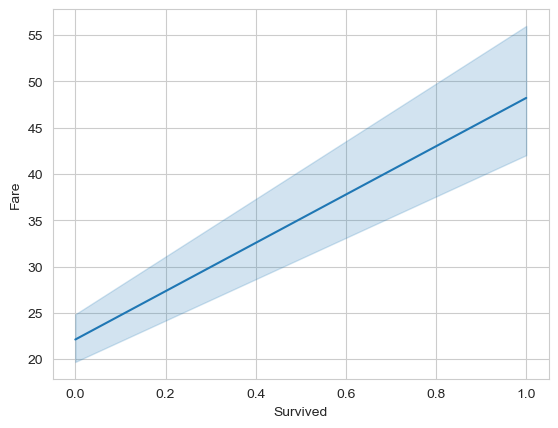

In [12]:
sns.lineplot(data=df,x='Survived',y='Fare')

The above plot implicitly shows that the rate of survival is directly proportional to the money you spend!

#### Countplots

As the name intiutively suggests this plot is used to visualise the count of occurrence of a particular category in a column

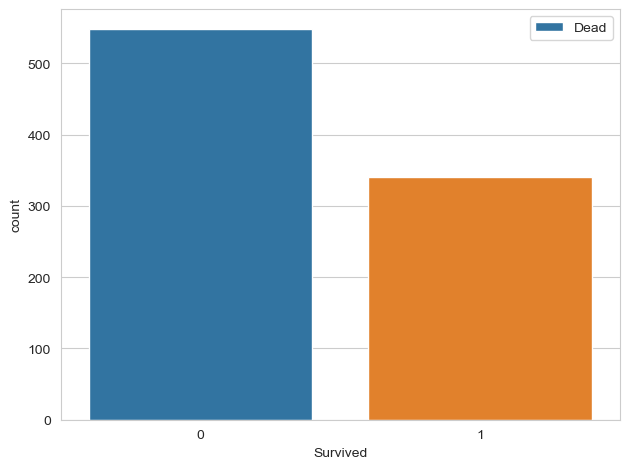

In [37]:
sns.countplot(data=df,x='Survived')
# 0 means DEAD and 1 means Survived the accident
plt.legend(labels=['Dead',"Survived"])
plt.tight_layout()

From the above plot we can infer that more people died of the accident and the count of survivors is less

<Axes: xlabel='Sex', ylabel='count'>

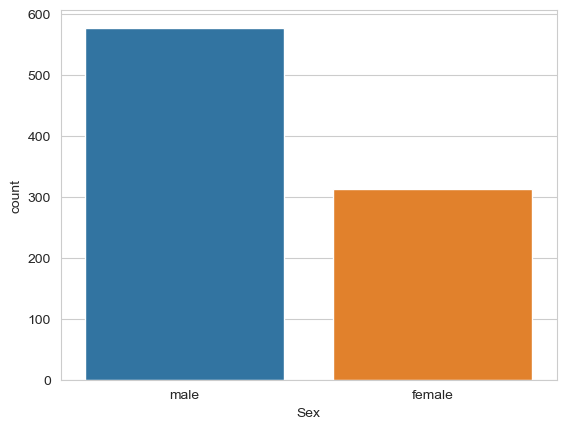

In [14]:
sns.countplot(data=df,x='Sex')

More males were in the ship than the females

<Axes: xlabel='Survived', ylabel='count'>

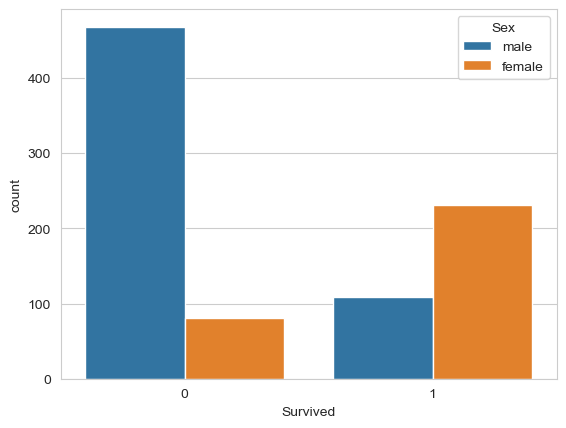

In [15]:
sns.countplot(data=df,x='Survived',hue='Sex')

More females survived the accident and the count of females dead is comparatively less to the number of males dead

<Axes: xlabel='Pclass', ylabel='count'>

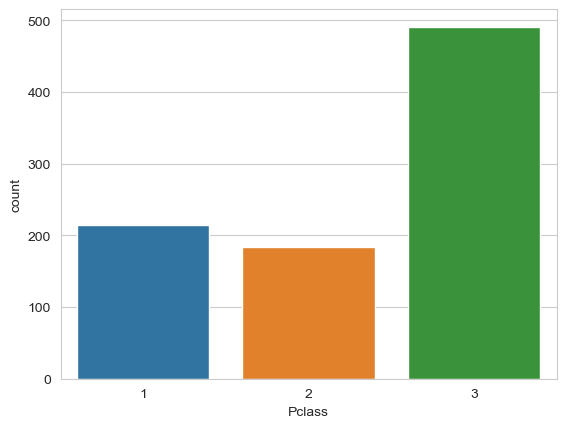

In [16]:
sns.countplot(data=df,x='Pclass')

More passengers were of the PClass 3

<Axes: xlabel='Pclass', ylabel='count'>

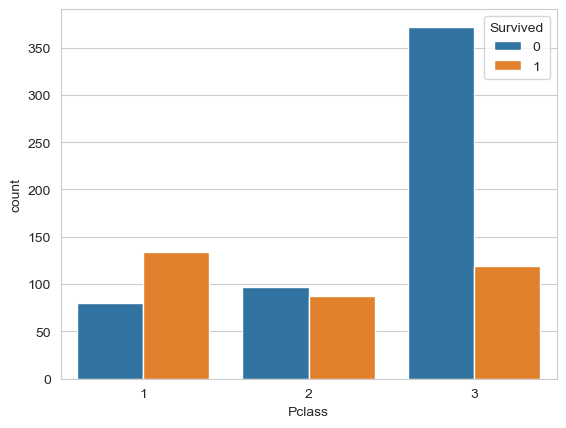

In [17]:
sns.countplot(data=df,x='Pclass',hue='Survived')

Count of PClass and their survival rate!!

<Axes: xlabel='Embarked', ylabel='count'>

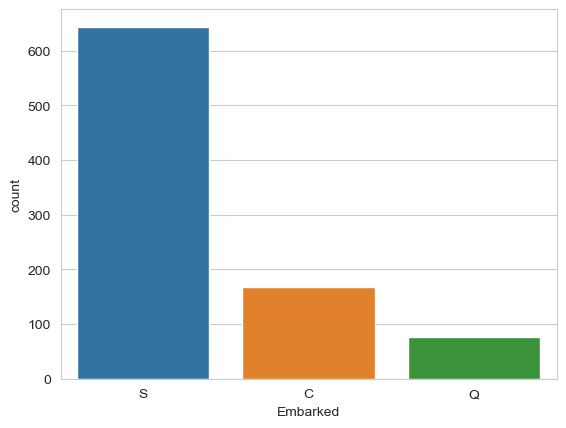

In [18]:
sns.countplot(data=df,x='Embarked')

This shows the count of passengers embarked on different locations with Southampton being the highest

<Axes: xlabel='Embarked', ylabel='count'>

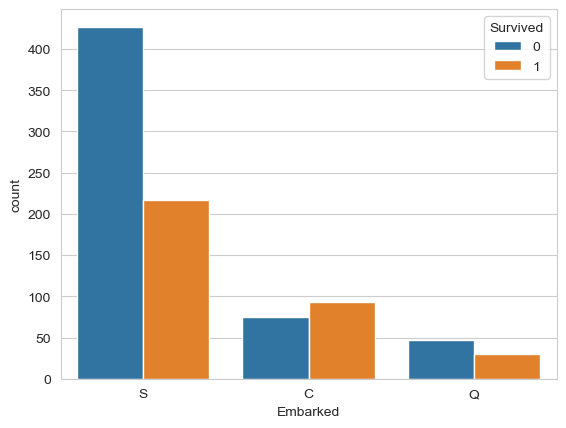

In [19]:
sns.countplot(data=df,x='Embarked',hue='Survived')

This shows the passengers rate of survival with their destination

#### Scatter Plots

Used to plot the relationship b/w 2 continous variables

<Axes: xlabel='Age', ylabel='Fare'>

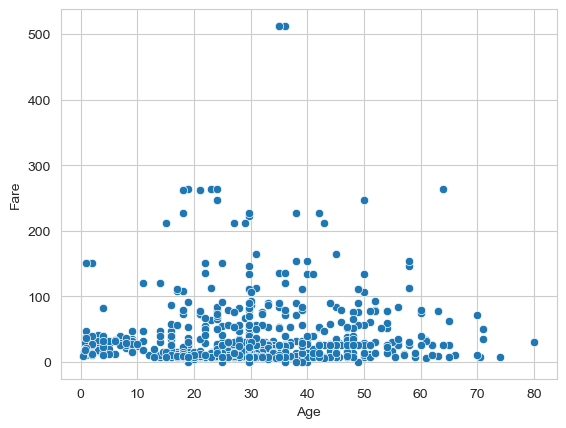

In [20]:
sns.scatterplot(data=df,x='Age',y='Fare')

This dataset doesn't have more continuous data to plot scatter plots so we'll drop it for now

#### Jointplots

Used for visualising the distribution and correlation of 2 variables

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


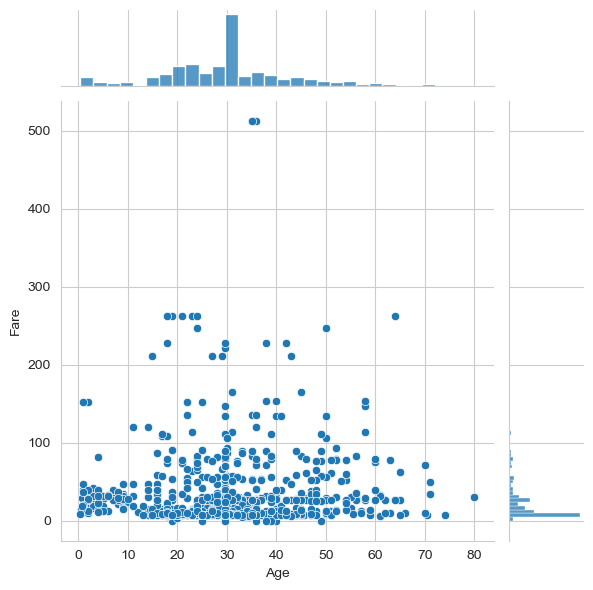

In [22]:
sns.jointplot(data=df,x='Age',y='Fare')

<Figure size 1000x600 with 0 Axes>

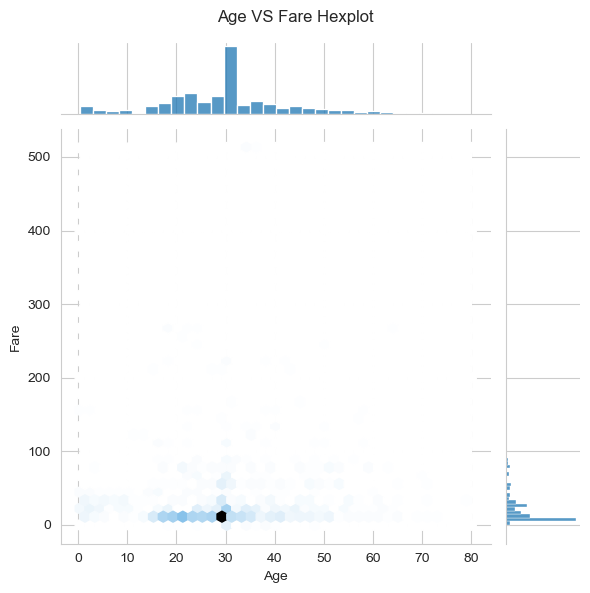

In [23]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df,x='Age',y='Fare',kind='hex')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.suptitle("Age VS Fare Hexplot")
plt.tight_layout()

#### Box Plots

Used to visualise the statistical datapoints like outliers, inter-quartile ranges etc of a variable

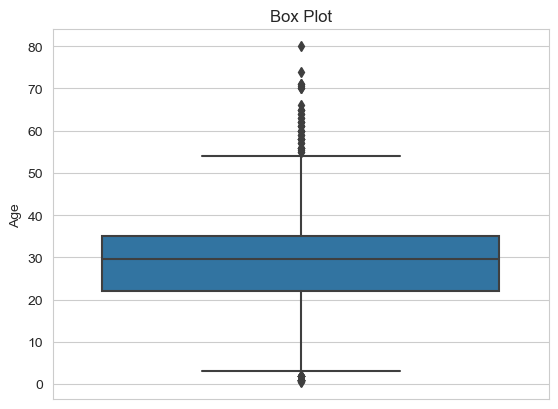

In [24]:
sns.boxplot(y='Age',data=df)
plt.title('Box Plot')
plt.show()

#### Violin Plot

Used to plot the distribution of variables

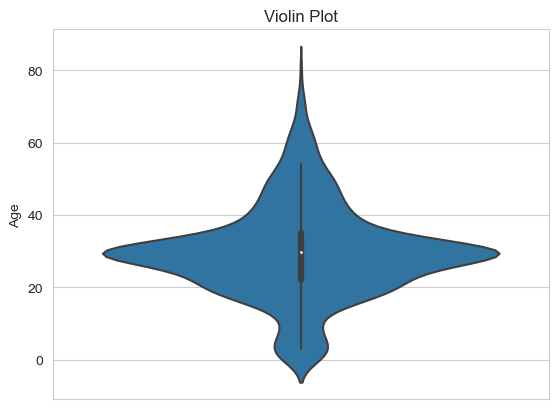

In [25]:
# Violin Plot
sns.violinplot(y='Age', data=df)
plt.title('Violin Plot')
plt.show()

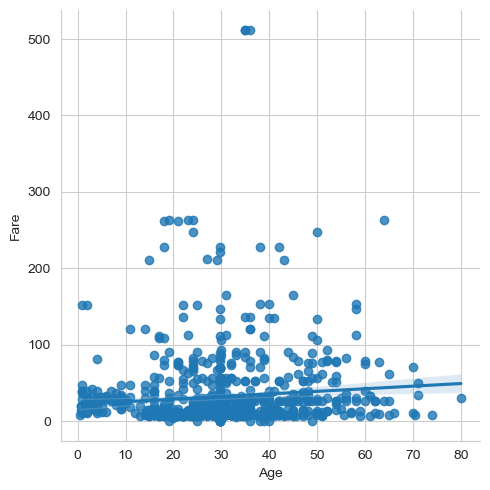

In [26]:
sns.lmplot(x='Age',y='Fare',data=df)

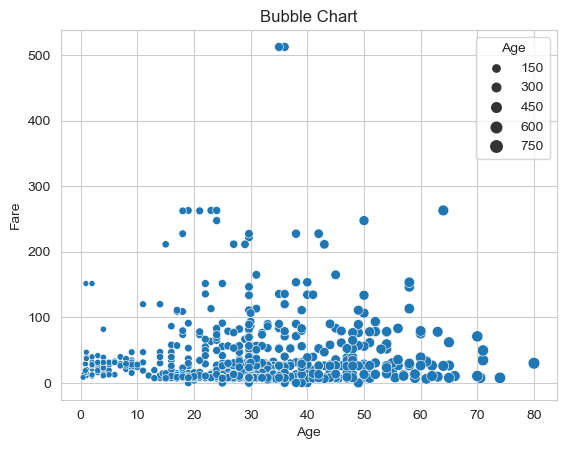

In [27]:
# Bubble Chart
bubble_sizes = df['Age'] * 10  # Scale the Age values for bubble sizes
sns.scatterplot(x='Age', y='Fare', size=bubble_sizes, data=df)
plt.title('Bubble Chart')
plt.show()


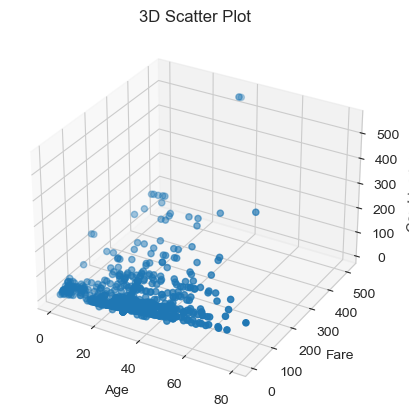

In [28]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

z_values = df['Age'] + df['Fare']  # Third variable

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Fare'], z_values)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Combined Value')
ax.set_title('3D Scatter Plot')
plt.show()


#### Pairplots

This creates a matrix of plots which plot all columns against one another.<br>

People who are well seasoned in EDA use this to get surface level understanding of the data.

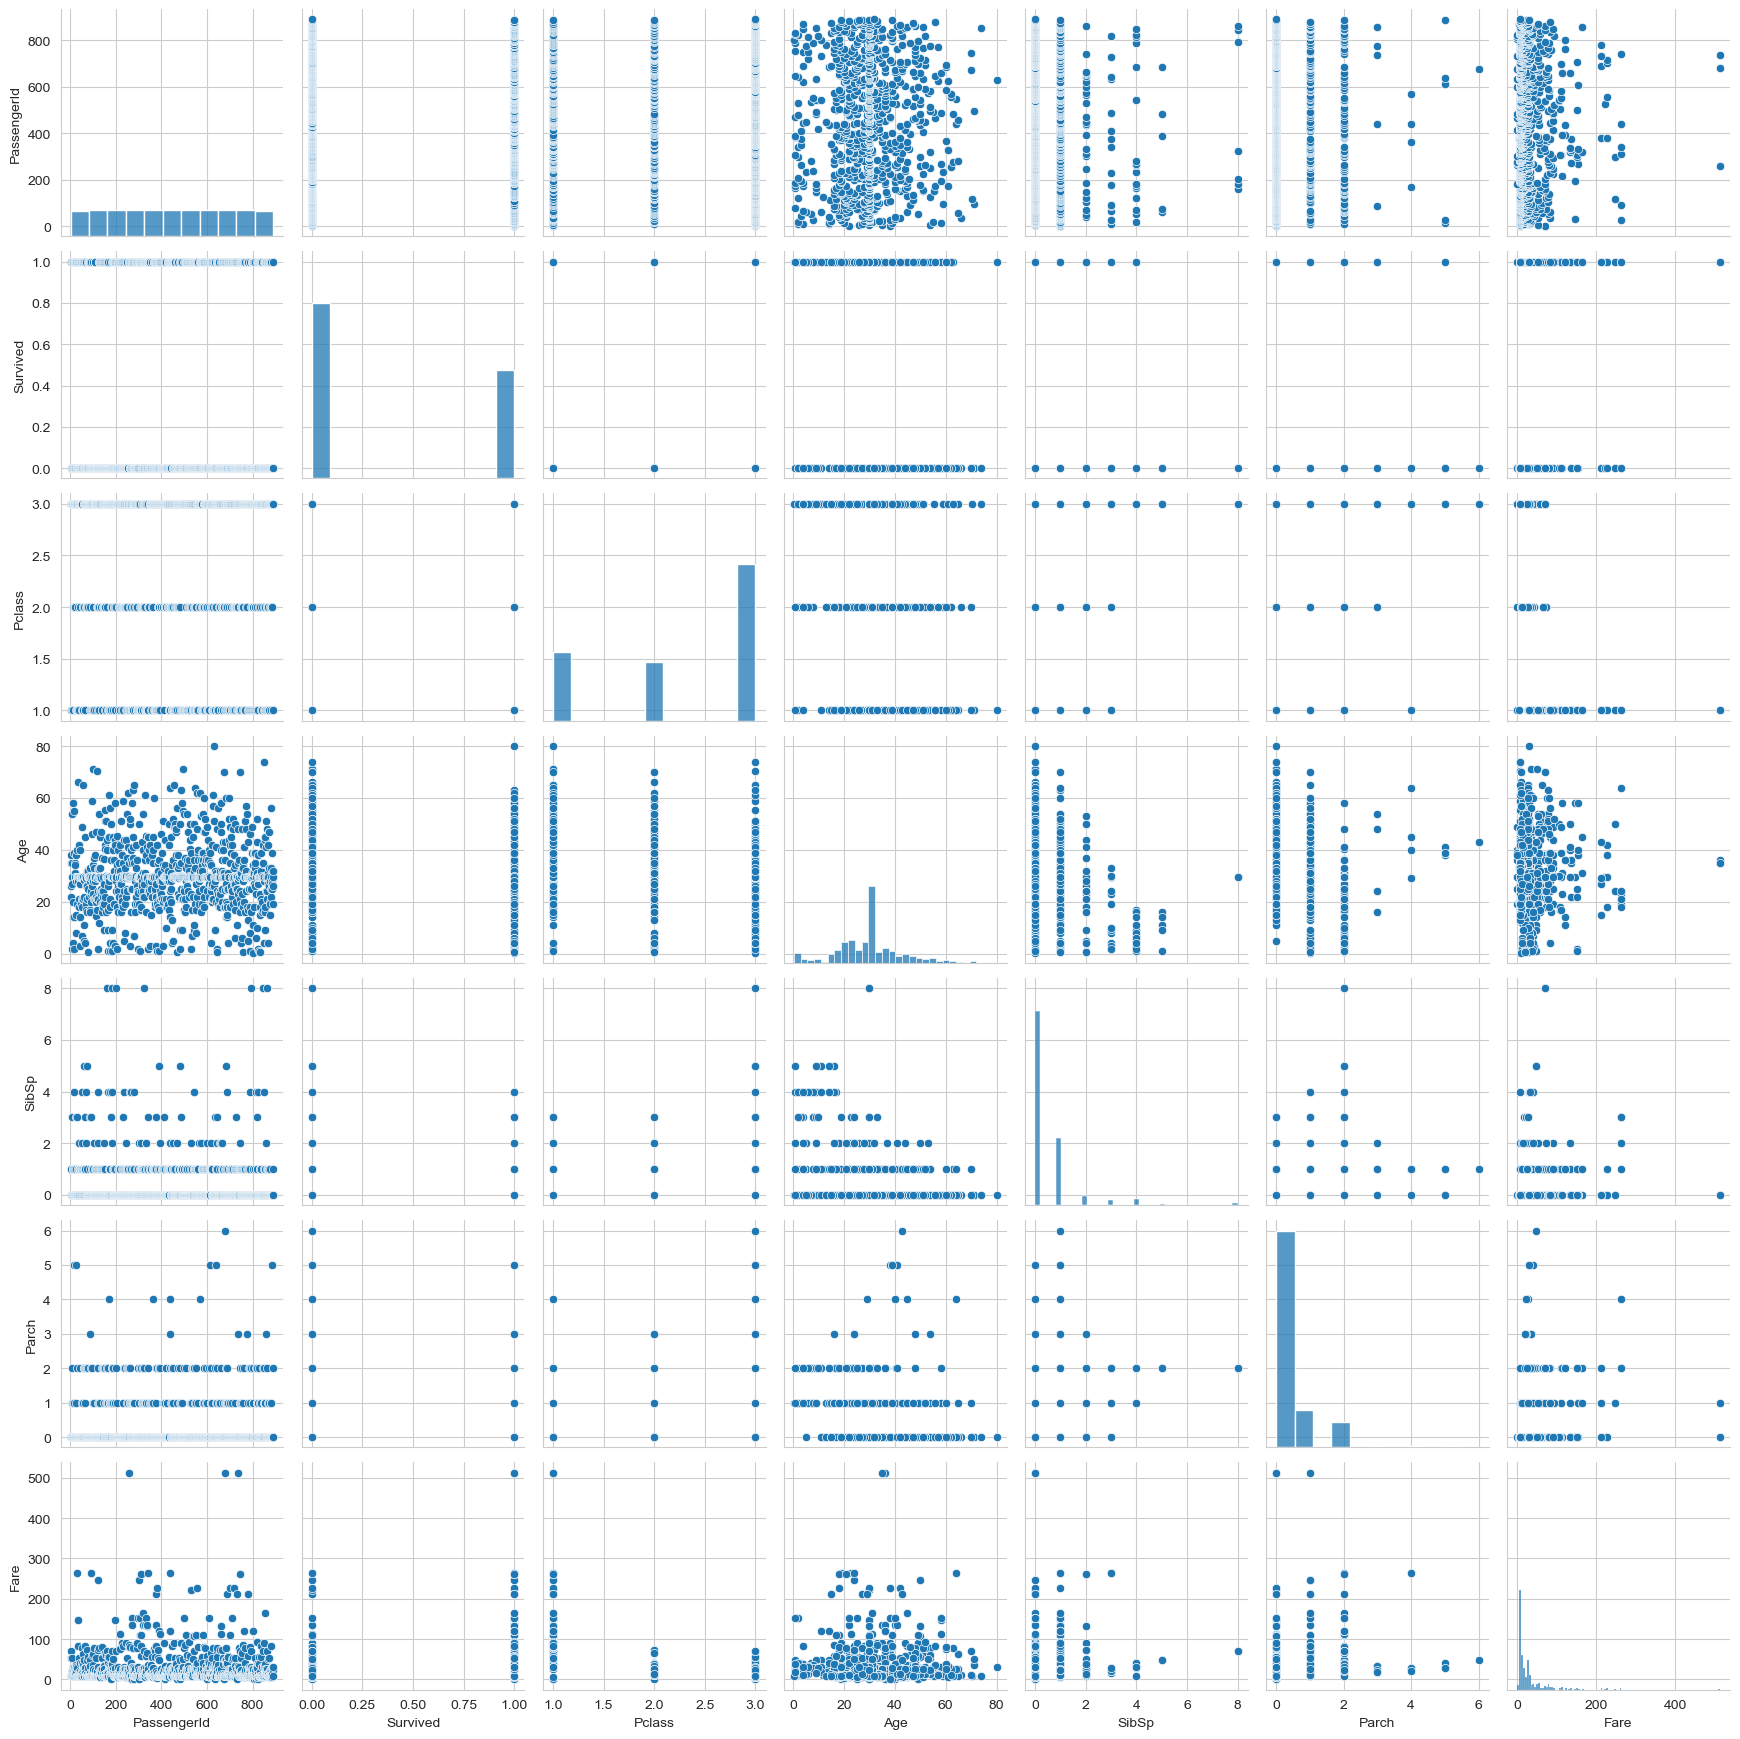

In [29]:
sns.pairplot(df)
plt.tight_layout()

## Performing Machine Learning

Let us for now use a simple ML Algorithm called Logistic Regression

It is used for binary classification, like a simple YES or NO!

#### Encoding the variables

Logistic Regression cannot tolerate non-numberic variables!!
So we encode categorical variables

#### Performing Label Encoding

Here we are removing the name column as Name makes no sense in predicting whether a person has survived or not

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df.drop(['Name'],axis=1,inplace=True)

/var/folders/hk/vx2_sbs105d_s095rfyygwdw0000gn/T/ipykernel_4006/1027772423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Name'],axis=1,inplace=True)


In [31]:
# Dropping the ticket variable as it has too much of noise in it!!
df.drop(['Ticket'],axis=1,inplace=True)
df

/var/folders/hk/vx2_sbs105d_s095rfyygwdw0000gn/T/ipykernel_4006/1633877519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Ticket'],axis=1,inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sex', 'Embarked'], dtype='object')

In [33]:
encoder = LabelEncoder()

In [34]:
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])


/var/folders/hk/vx2_sbs105d_s095rfyygwdw0000gn/T/ipykernel_4006/2926993563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
/var/folders/hk/vx2_sbs105d_s095rfyygwdw0000gn/T/ipykernel_4006/2926993563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])


#### Getting and Cleaning the test data

It's now time to get and clean the test data

In [35]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
missing_values = pd.DataFrame(round(100*(test.isnull().sum()/len(test.index)),2).rename("Missing values %").sort_values(ascending=False))
missing_values

,Missing values %
Cabin,78.23
Age,20.57
Fare,0.24
PassengerId,0.00
Pclass,0.00
Name,0.00
Sex,0.00
SibSp,0.00
Parch,0.00
Ticket,0.00


#### Dropping the Cabin variable as it is 78.23% missing

In [37]:
test.drop(['Cabin'],axis=1,inplace=True)

#### Imputing the missing values in Age variable as it is only 20.57% missing

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'Age' column
test['Age'] = imputer.fit_transform(test[['Age']])
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


#### Dropping the rows where Fare Variable is missing as it is only some 0.24% missing

In [39]:
test.dropna(subset=['Fare'],inplace=True)

#### Dropping variables with noise

These variables contain much noise in them and are not useful for prediction, so we are dropping them

In [40]:
test.drop('Name',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [41]:
missing_values = pd.DataFrame(round(100*(test.isnull().sum()/len(test.index)),2).rename("Missing values %").sort_values(ascending=False))
missing_values

,Missing values %
PassengerId,0.0
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Embarked,0.0


### Separating our Categorical and Target Variables

In [42]:
cat_col = test.select_dtypes(include='object')
for col in cat_col:
    test[col] = encoder.fit_transform(test[col])

test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,1
1,893,3,0,47.00000,1,0,7.0000,2
2,894,2,1,62.00000,0,0,9.6875,1
3,895,3,1,27.00000,0,0,8.6625,2
4,896,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,2
414,1306,1,0,39.00000,0,0,108.9000,0
415,1307,3,1,38.50000,0,0,7.2500,2
416,1308,3,1,30.27259,0,0,8.0500,2


In [43]:
x_train = df.drop(['Survived'],axis=1)
y_train = df['Survived']

# Creating our MODEL!!!

We are using Logistic Regression to predict the outcome of survival

In [44]:
from sklearnex.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(max_iter=100000)

In [46]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [47]:
result = model.predict(test)

### Calculating the different evaluation metrics for performance

This part is like testing your model's performance

Trust me I hate tests, and I hate this part :(

In [48]:
scores = pd.read_csv("scores.csv")

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(scores['Survived'], result)

# Calculate precision
precision = precision_score(scores['Survived'], result)

# Calculate recall
recall = recall_score(scores['Survived'], result)

# Calculate F1-score
f1 = f1_score(scores['Survived'], result)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.947242206235012
Precision: 0.9113924050632911
Recall: 0.9473684210526315
F1-score: 0.9290322580645162


#### Plotting a confusion matrix

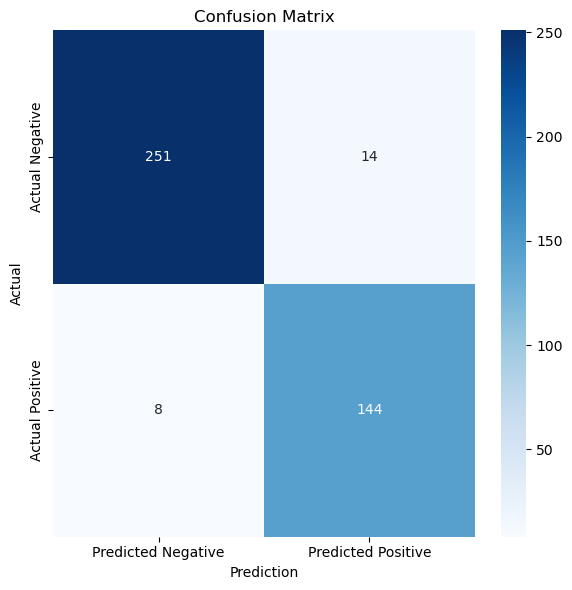

In [50]:
cm = confusion_matrix(scores['Survived'], result)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()

# That's the end of the story folks!!

Hope you were able to understand this.
Feel free to ask anything if you want

Happy Coding!!